#FITZ ROY

Trabalho prático: O objetivo desta atividade é utilizar spline cúbica, curva paramétrica e curva de Bézier para modelar o perfil de alguma montanha famosa. Escolha uma foto de alguma montanha levando em consideração dois aspectos: a viabilidade e o grau de interesse. Por exemplo, se a foto é muito próxima serão necessárias muitas curvas, dando muito trabalho. Por outro lado, fotos de montanhas com perfil monótono torna o trabalho muito trivial. Vale a pena então procurar por fotos mais próximas ou mais distantes, pegando um relevo mais amplo.

###**JESSICA E RIAN**

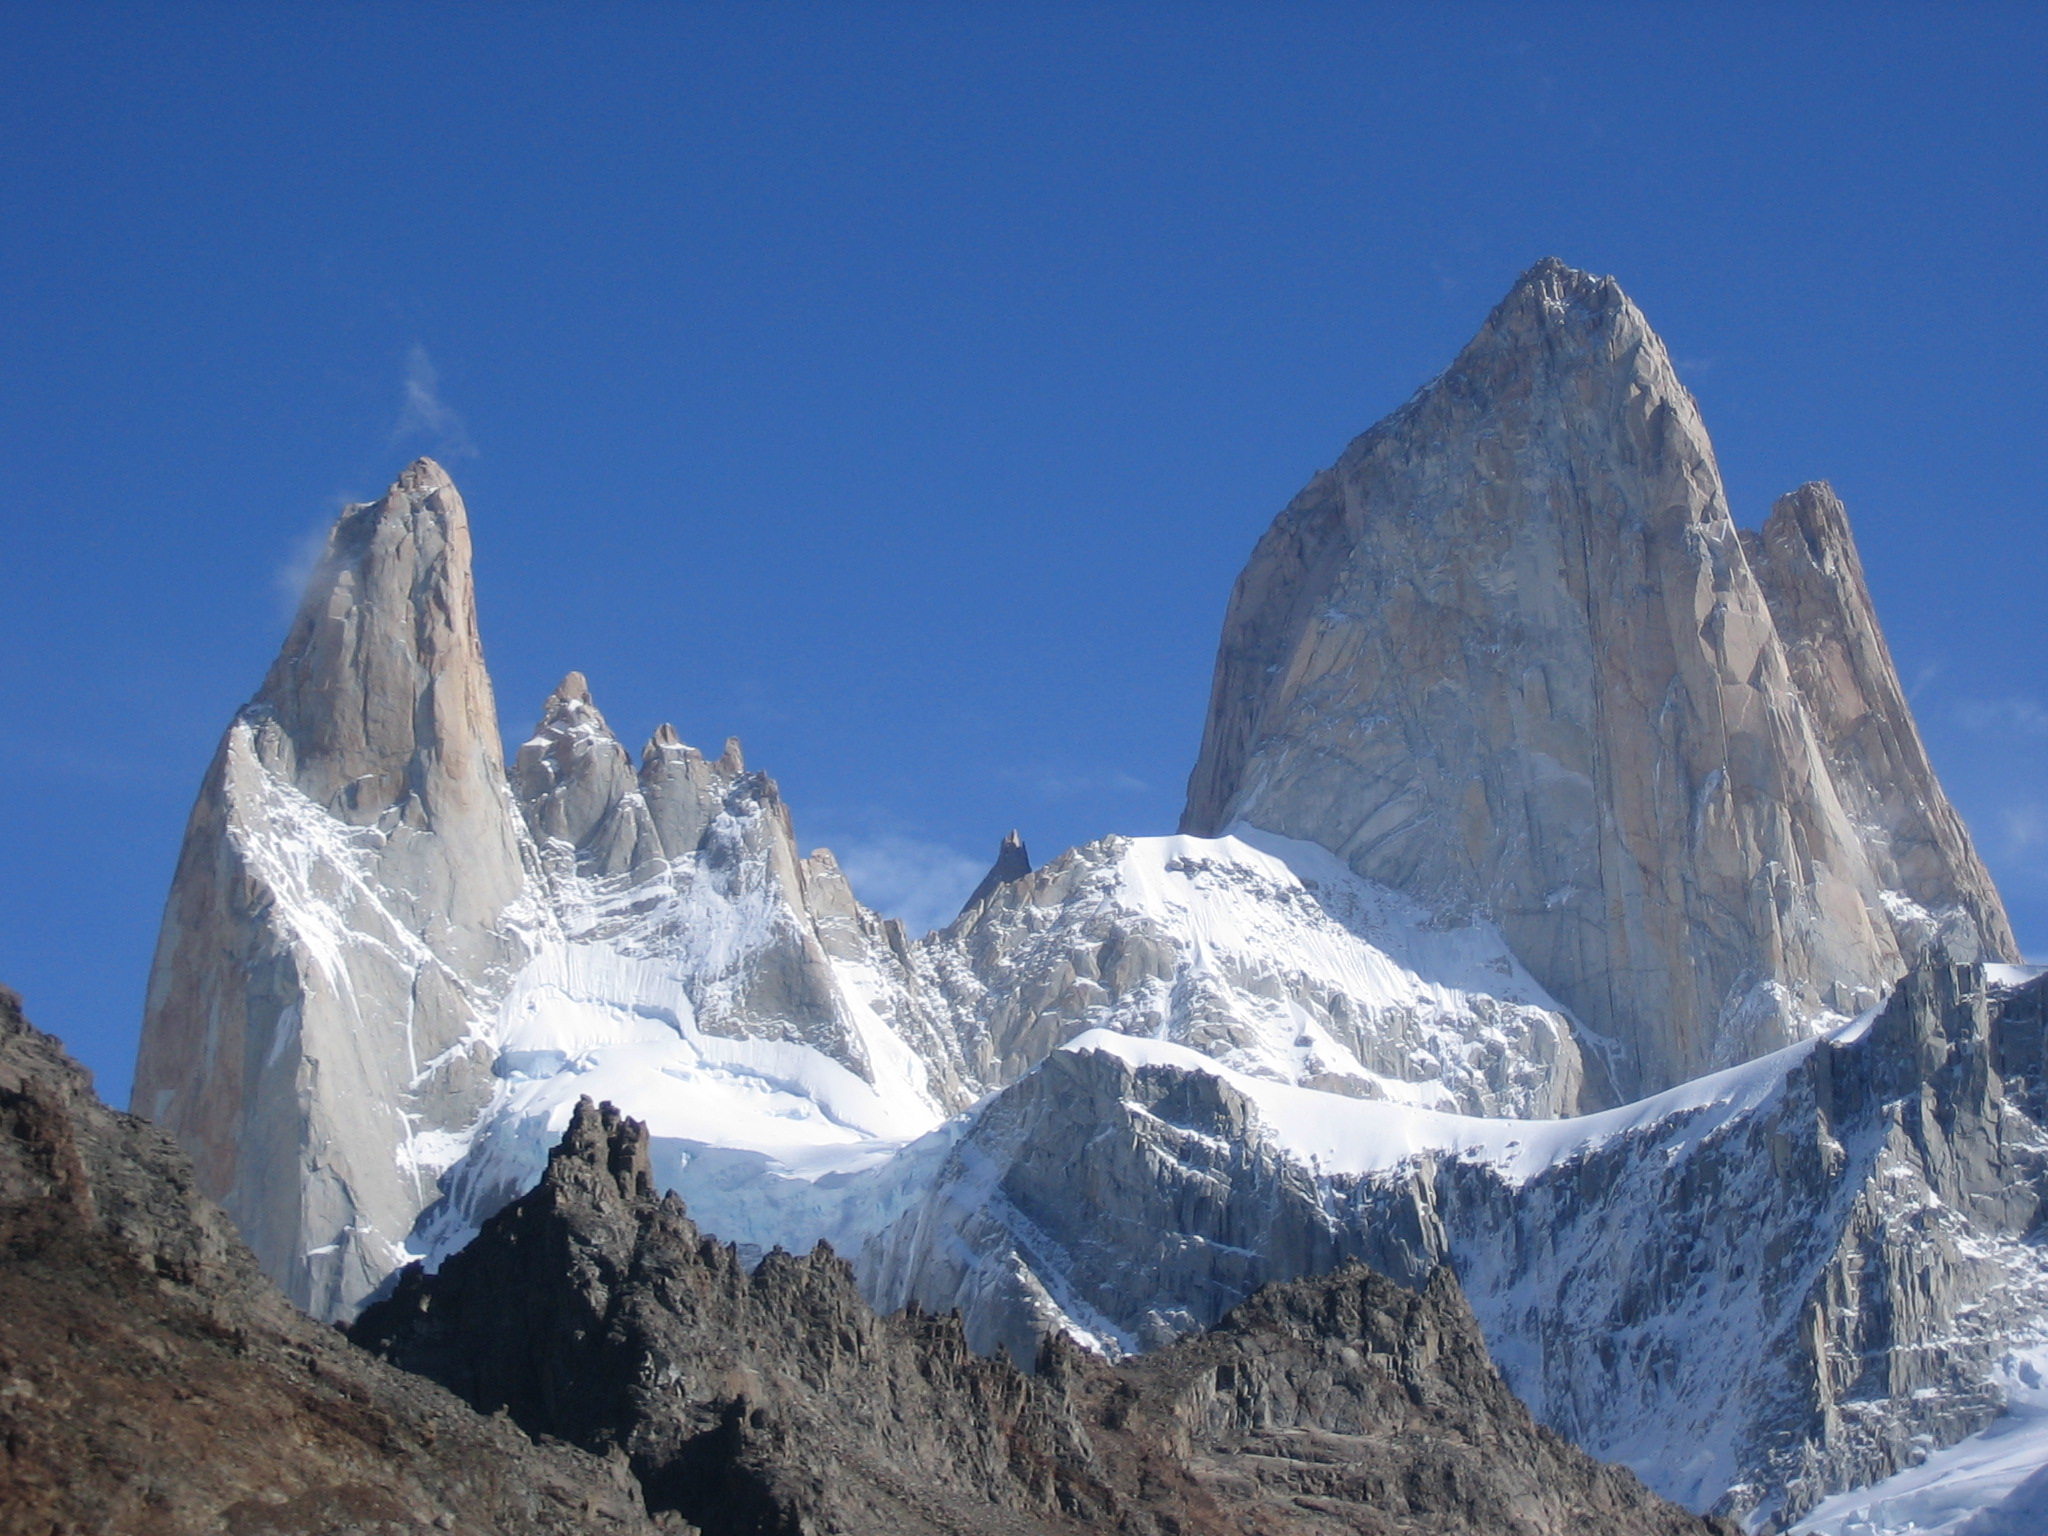

##BIBLIOTECAS E PONTOS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pontos de controle comuns
x = np.array([1.1,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.20,1.21,1.22,1.23,1.25,1.27,1.30,1.31,1.32,1.325,1.34,1.36,1.39,1.395,1.4,1.44,1.445,1.47,1.48,1.6,1.61,1.62,1.7,1.771,1.82,1.85,1.86,1.87,1.88,1.89,1.91,1.97,1.98,2,2.1,2.11,2.12])
y = np.array([30,45,60,90,120,150,180,210,230,240,245,260,245,170,200,170,185,180,183,165,180,165,140,165,270,260,280,300,230,240,240,130,60,100,120,90,110,90,100,120,130,120,90,110,90,110])




##Curva Spline Cúbica


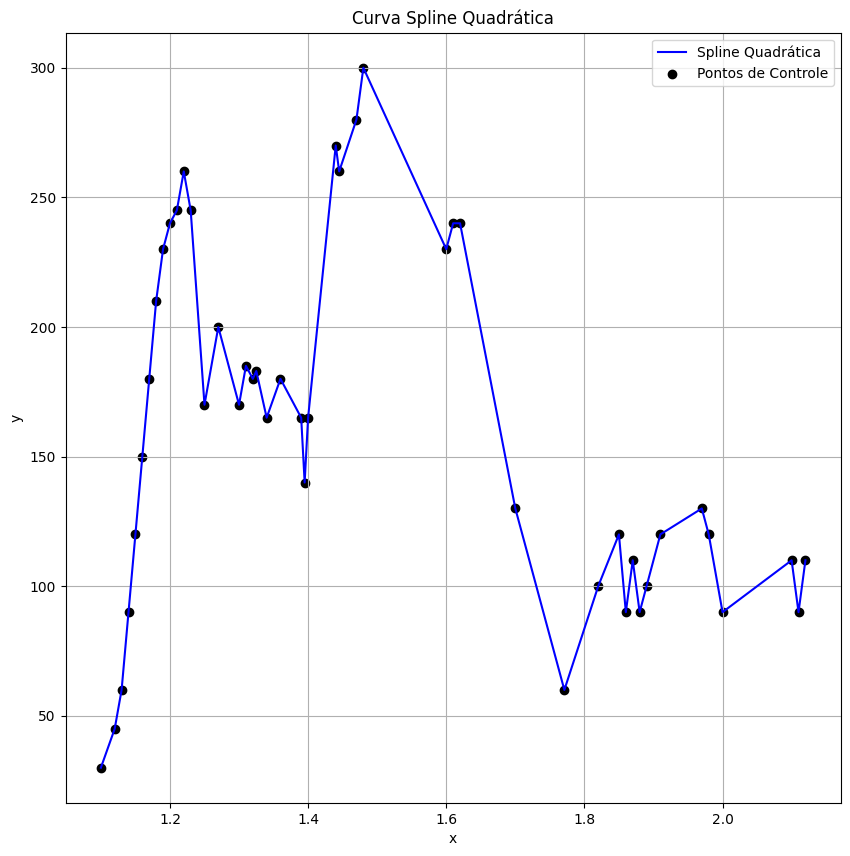

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que 'x' e 'y' são seus dados de entrada
# Número de splines
n = len(x) - 1

# Passo 1: Calcular h e delta
h = np.diff(x)
delta = np.diff(y) / h

# Passo 2: Montar o sistema tridiagonal para os coeficientes 'c'
A = np.zeros((n + 1, n + 1))
b = np.zeros(n + 1)

# Condições de contorno para spline quadrática (por exemplo, splines naturais)
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = h[i-1]
    A[i, i] = 2 * (h[i-1] + h[i])
    A[i, i+1] = h[i]
    b[i] = 3 * (delta[i] - delta[i-1])

# Passo 3: Resolver o sistema linear Ac = b para encontrar 'c'
c = np.linalg.solve(A, b)

# Passo 4: Calcular os coeficientes 'a', 'b'
a = y[:-1]
b = delta - (h * (2*c[:-1] + c[1:]) / 3)

# Passo 5: Definir a função da spline quadrática
def quadratic_spline(x_val):
    for i in range(n):
        if x[i] <= x_val <= x[i+1]:
            return a[i] + b[i]*(x_val - x[i]) + c[i]*(x_val - x[i])**2
    return None


# Plotagem da spline quadrática e das divisões
plt.figure(figsize=(10, 10))
plt.plot(x, y, label='Spline Quadrática', color='blue')
plt.scatter(x, y, color='black', label='Pontos de Controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curva Spline Quadrática')
plt.grid(True)
plt.show()


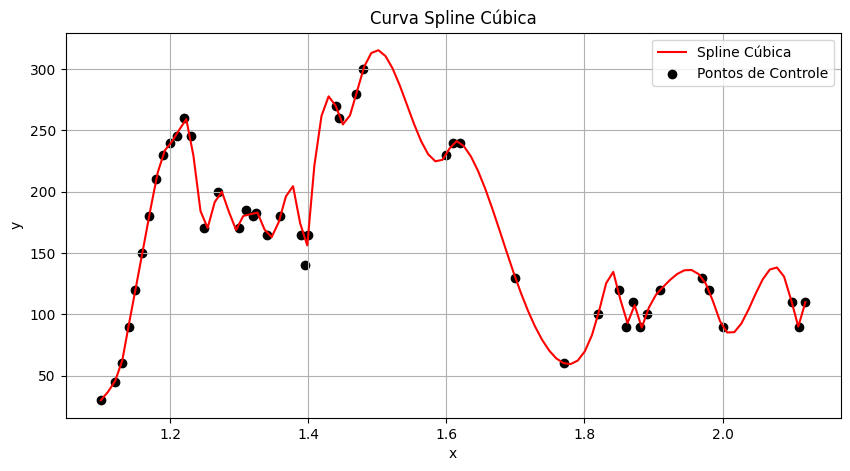

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Número de splines
n = len(x) - 1

# Passo 1: Calcular h e delta
h = np.diff(x)
delta = np.diff(y) / h

# Passo 2: Montar o sistema tridiagonal para os coeficientes 'c'
A = np.zeros((n + 1, n + 1))
b = np.zeros(n + 1)

A[0, 0] = 1
A[n, n] = 1

for i in range(1, n):
    A[i, i-1] = h[i-1]
    A[i, i] = 2 * (h[i-1] + h[i])
    A[i, i+1] = h[i]
    b[i] = 3 * (delta[i] - delta[i-1])

# Passo 3: Resolver o sistema linear Ac = b para encontrar 'c'
c = np.linalg.solve(A, b)

# Passo 4: Calcular os coeficientes 'a', 'b' e 'd'
a = y[:-1]
b = delta - (h * (2*c[:-1] + c[1:]) / 3)
d = (c[1:] - c[:-1]) / (3 * h)

# Passo 5: Definir a função da spline cúbica
def cubic_spline(x_val):
    for i in range(n):
        if x[i] <= x_val <= x[i+1]:
            return a[i] + b[i]*(x_val - x[i]) + c[i]*(x_val - x[i])**2 + d[i]*(x_val - x[i])**3
    return None

# Gerar pontos na spline cúbica
xs = np.linspace(min(x), max(x), 100)
ys = np.array([cubic_spline(xi) for xi in xs])

# Plotagem da spline cúbica
plt.figure(figsize=(10, 5))
plt.plot(xs, ys, label='Spline Cúbica', color='red')
plt.scatter(x, y, color='black', label='Pontos de Controle')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curva Spline Cúbica')
plt.grid(True)
plt.show()

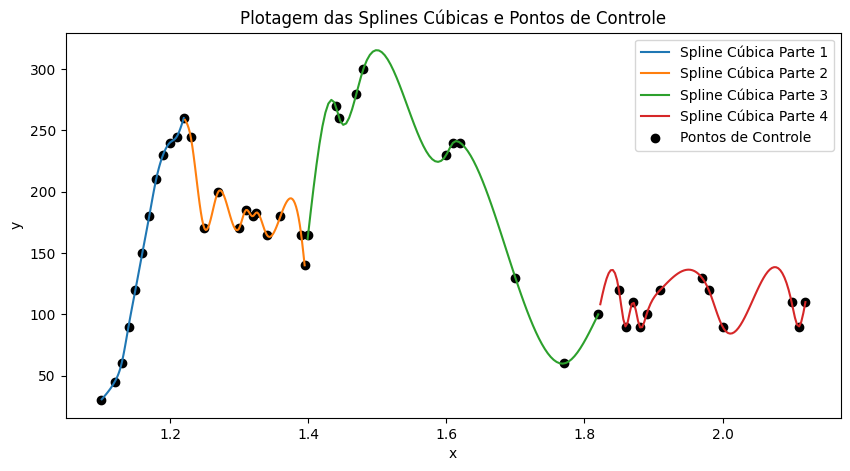

In [ ]:
# Dividir os dados em 4 partes, garantindo que cada parte comece onde a anterior terminou
indices = np.linspace(0, len(x) - 1, 5).astype(int)
partes = [range(indices[i], indices[i+1]+1) for i in range(len(indices)-1)]


def calcular_spline_cubica(x, y):
    n = len(x) - 1
    h = np.diff(x)
    delta = np.diff(y) / h

    # Montar o sistema tridiagonal para os coeficientes 'c'
    A = np.zeros((n + 1, n + 1))
    b = np.zeros(n + 1)

    A[0, 0] = 1
    A[n, n] = 1

    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        b[i] = 3 * (delta[i] - delta[i-1])

    # Resolver o sistema linear Ac = b para encontrar 'c'
    c = np.linalg.solve(A, b)

    # Calcular os coeficientes 'a', 'b' e 'd'
    a = y[:-1]
    b = delta - (h * (2*c[:-1] + c[1:]) / 3)
    d = (c[1:] - c[:-1]) / (3 * h)

    return a, b, c[:-1], d

# Função da spline cúbica para um intervalo
def spline_cubica(xi, a, b, c, d, x_p):
    i = np.searchsorted(x_p, xi) - 1
    if i >= 0 and i < len(a):
        return a[i] + b[i]*(xi - x_p[i]) + c[i]*(xi - x_p[i])**2 + d[i]*(xi - x_p[i])**3
    return None

# Calcular os coeficientes da spline cúbica
a, b, c, d = calcular_spline_cubica(x, y)

# Plotagem das splines cúbicas para cada parte
plt.figure(figsize=(10, 5))
for i, indices in enumerate(partes):
    x_parte = x[indices]
    y_parte = y[indices]
    a, b, c, d = calcular_spline_cubica(x_parte, y_parte)
    xs = np.linspace(min(x_parte), max(x_parte), 100)
    ys = [spline_cubica(xi, a, b, c, d, x_parte) for xi in xs]
    plt.plot(xs, ys, label=f'Spline Cúbica Parte {i+1}')

# Adicionando os pontos de controle
plt.scatter(x, y, color='black', label='Pontos de Controle')

# Adicionando legendas e título
plt.legend()
plt.title('Plotagem das Splines Cúbicas e Pontos de Controle')
plt.xlabel('x')
plt.ylabel('y')

# Exibindo o gráfico
plt.show()

##Curva Paramétrica


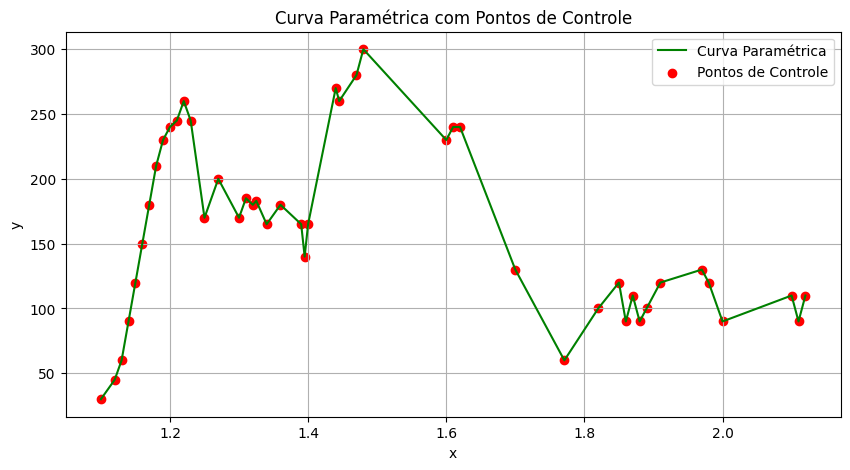

In [ ]:
# Função para interpolação linear
def interpolar(t_values, x_values, y_values):
    x_parametric = []
    y_parametric = []

    for t in t_values:
        # Encontrar os índices dos pontos entre os quais estamos interpolando
        i = int(t * (len(x_values) - 1))
        j = min(i + 1, len(x_values) - 1)

        # Calcular a fração entre os pontos
        t_frac = (t * (len(x_values) - 1)) - i

        # Interpolação linear para x e y
        x_interp = x_values[i] + (x_values[j] - x_values[i]) * t_frac
        y_interp = y_values[i] + (y_values[j] - y_values[i]) * t_frac

        x_parametric.append(x_interp)
        y_parametric.append(y_interp)

    return x_parametric, y_parametric

# Gerar valores paramétricos de t
t_values = [i / (len(x) - 1) for i in range(len(x))]

# Realizar a interpolação
x_parametric, y_parametric = interpolar(t_values, x, y)

# Plotagem da curva paramétrica e dos pontos de controle
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(x_parametric, y_parametric, label='Curva Paramétrica', color='green')
plt.scatter(x, y, color='red', label='Pontos de Controle')  # Adicionando os pontos de controle
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curva Paramétrica com Pontos de Controle')
plt.grid(True)
plt.show()


##Curva de Bézier


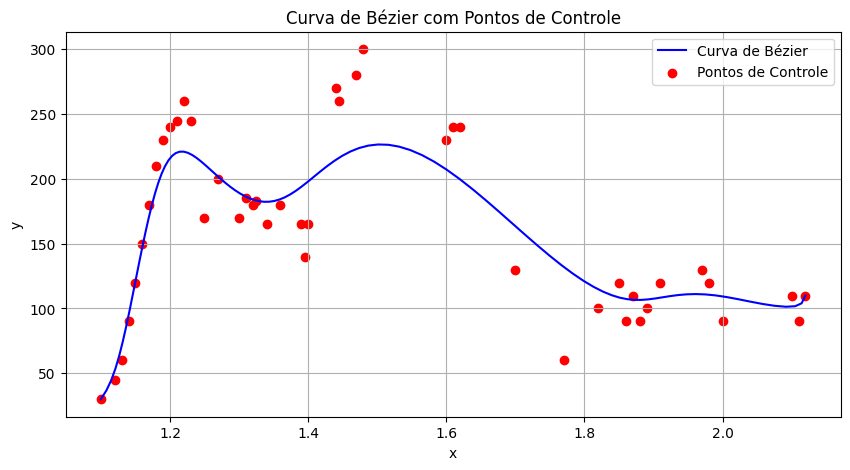

In [ ]:

# Curva de Bézier
def calcular_ponto_bezier(points, t):
    n = len(points) - 1
    point = [0.0, 0.0]
    for i in range(n + 1):
        binomial_coeff = 1
        for j in range(i):
            binomial_coeff *= (n - j) / (j + 1)
        term = (1 - t)**(n - i) * t**i * binomial_coeff
        point[0] += term * points[i][0]
        point[1] += term * points[i][1]
    return point

bezier_points = np.array(list(zip(x, y)))
bz = np.array([bezier_curve(bezier_points, t_) for t_ in np.linspace(0, 1, 100)])

# Plotagem da curva de Bézier
plt.figure(figsize=(10, 5))
plt.plot(bz[:, 0], bz[:, 1], label='Curva de Bézier', color='blue')
plt.scatter(x, y, color='red', label='Pontos de Controle')  # Adicionando os pontos de controle
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curva de Bézier com Pontos de Controle')
plt.grid(True)
plt.show()

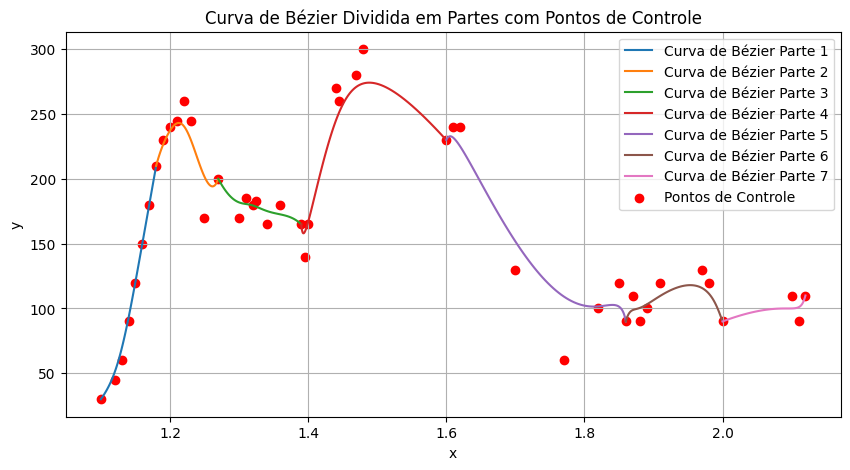

In [ ]:
#Dividir os pontos de controle em 6 partes
partes = []
tamanho_parte = len(x) // 6
for i in range(0, len(x), tamanho_parte):
    if i + tamanho_parte < len(x):
        partes.append(np.array(list(zip(x[i:i+tamanho_parte+1], y[i:i+tamanho_parte+1]))))
    else:
        partes.append(np.array(list(zip(x[i:], y[i:]))))

# Função para calcular um ponto na curva de Bézier
def calcular_ponto_bezier(points, t):
    n = len(points) - 1
    point = [0.0, 0.0]
    for i in range(n + 1):
        binomial_coeff = 1
        for j in range(i):
            binomial_coeff *= (n - j) / (j + 1)
        term = (1 - t)**(n - i) * t**i * binomial_coeff
        point[0] += term * points[i][0]
        point[1] += term * points[i][1]
    return point

# Plotagem das curvas de Bézier para cada parte
plt.figure(figsize=(10, 5))
for i, pontos in enumerate(partes):
    bz = np.array([bezier_curve(pontos, t_) for t_ in np.linspace(0, 1, 100)])
    plt.plot(bz[:, 0], bz[:, 1], label=f'Curva de Bézier Parte {i+1}')

# Adicionando os pontos de controle
plt.scatter(x, y, color='red', label='Pontos de Controle')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curva de Bézier Dividida em Partes com Pontos de Controle')
plt.grid(True)
plt.show()